<img src="https://raw.githubusercontent.com/flatiron-school/Online-DS-FT-022221-Cohort-Notes/master/Phase_5/tableau/images/tableau_cmyk_2015.png" width=50%>

# Tableau Fundamentals

- 07/08/21
- 02221FT

## Topics

- Tableau vs Tableau Public
- Installing Tableau Public
- Loading Data Files 
- Key Vocabulary
- Making Several Types of Plots
    - Scatter Plots with Trendlines
    - Histograms/Grouped Histogram
    - Map scatter plot 
    - Map Shaded Area Plot
- Customizing Plots
- Your Tableau Profile



## Resources/References

- Udemy Course: **Tableau 2020 A-Z: Hands-On Tableau Training for Data Science**
    - https://www.udemy.com/course/tableau10/
- Official Tableau Video Resources:
 - https://public.tableau.com/en-us/s/resources

# Tableau vs Tableau Public

- Tableau Public is the free version of Tableau.
- They are VERY similar, but there are important distinctions:
    - Data Access
        - Tableau can access SQL servers
        - Tableau Public cannot.
    - Saving Projects:
        - Tableau can save and load projects locally.
        - Tableau Public can only save to the cloud

# Installing Tableau Public

- https://public.tableau.com/en-us/s/

# Loading Data

- Tableau Public can load data from many file types:
    - Excel
    - Text Files (csv,tsv)
    - JSON Files
    - Google Sheets
    - etc.
    
- We will download the 2 csv's we will be using into this repo's folder. 

# Basic Tableau Vocab

- Dimensions: 
    - categorical features/independent variables
    - Show up in Blue on Columns/Row view

- Measures: 
    - numeric features / dependent variables.
    - Measures get aggregated (SUM, MEAN,etc)
    - Shows up in Green on Columns/Row View

- Attributes
    - ??? (surprisingly hard to find a definition)
    - See [this blog post](http://paintbynumbersblog.blogspot.com/2013/04/a-handy-use-of-attributes-in-tableau.html) for an example of when you'd want to make something an Attribute.


### Python Imports/Prep

In [1]:
# !pip install -U fsds
import fsds as fs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# plt.style.use(['seaborn-talk','dark_background',])
# pio.templates.default='plotly_dark'

In [2]:
import plotly.express as px
import plotly.io as pio
px.defaults.width = 700
px.defaults.height = 500

# King's County Tasks

## Load in `regression_data_details.csv`

In [3]:
df1 = fs.datasets.load_mod1_proj(read_csv_kwds={'index_col':0})
display(df1.head(2))
df1.to_csv('regression_data_complete.csv')

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                             
7129300520  10/13/2014  221900.0         3       1.00         1180      5650   
6414100192   12/9/2014  538000.0         3       2.25         2570      7242   

            floors  waterfront  view  condition  grade  sqft_above  \
id                                                                   
7129300520     1.0         NaN   0.0          3      7        1180   
6414100192     2.0         0.0   0.0          3      7        2170   

           sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                            
7129300520           0.0      1955           0.0    98178  47.5112 -122.257   
6414100192         400.0      1951        1991.0    98125  47.7210 -122.319   

            sqft_living15  sqft_lot15  
id                                     
7129300520           1340        5650  
6414100192           1690        7639

In [4]:
## Additional prep steps for python figs
df1.rename({'long':'lon'},axis=1,inplace=True)
df1['waterfront'] = df1['waterfront'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  object 
 8   view           21534 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  lon            21597 non-null  float

> - Open Tableau Public and load up the first housing regression dataset file (`regression_data_details.csv`)
    - CSVs are technically "Text Files"   

> - Notice that Tableau automatically replaced text values in numeric columns ('?' in sqft)
    - It also cleaned up the column names (`sqft_living` -> "Sqft Living")
  
- Now click "Go to Worksheet" / "Sheet 1" at the bottom of the app.



## Plots to Make: King's County Housing Data

1. [ ] A scatter plot of Sqft Living vs Price + a trendline.
2. [ ] A scatter plot of Sqft Living vs Price grouped by if its waterfront property (+ trendlines) <br><t>(first with null values then without)
3. [ ] A histogram of price in in **\$**100K-bins.
4. [ ] A histogram of price in in **\$**100K-bins broken out by Waterfront properties.
5. [ ] A map of median prices by zipcode (with a Green color scale broken into 5 shades of green)- see note about maps below.
6. [ ] A map of all homes with color-coded price with the smallest markers possible. 

    
> - **Note: for our maps, we want:**
    - A dark background,
    - Add County names/borders
    - Add major cities
    - Add terrain
    - Add major roadways. 

    
- [ ] **Save the workbook to Tableau Public and make sure it shows all individual sheets.**



###  1. A scatter plot of Sqft Living vs Price + a trendline.

#### Python Answer - Seaborn

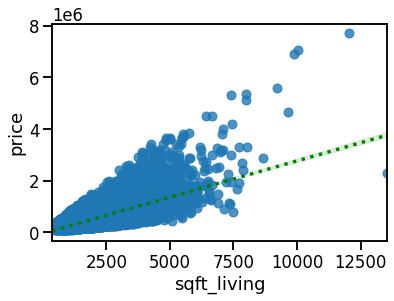

In [6]:
sns.regplot(data=df1, x='sqft_living',y='price',line_kws={'color':'green',"ls":':'});

#### Python Answer - Plotly


In [9]:
px.scatter(df1, x='sqft_living',y='price',trendline='ols',
           trendline_color_override='green')

#### Tableau Answer


- Answer: 
    - Columns = Sqft Living (Dimension)
    - Rows = Price (Dimension)
    - Change to Analysis Tab -> Trendline


### 2. A scatter plot of Sqft Living vs Price grouped by if its waterfront property (+ trendlines) 
- (first with null values then without)
    

#### Python Answer - Seaborn

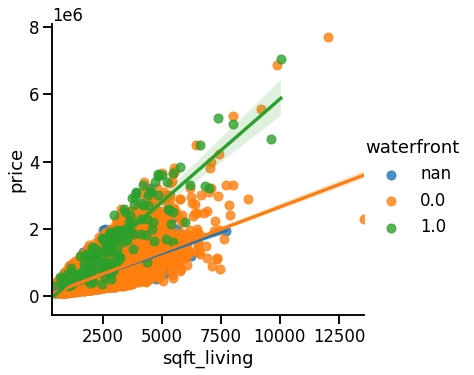

In [12]:
sns.lmplot(data=df1, x='sqft_living',y='price',hue='waterfront');

#### Python Answer - Plotly


In [13]:
px.scatter(df1, x='sqft_living',y='price',color='waterfront',trendline='ols',
           trendline_color_override='green')

#### Tableau Answer

- Answer:
    - Duplicate sheet/plot #1
    - Right Click Waterfront -> Convert to Dimension
    - Drag Waterfront -> Color
    
    - To remove Null values:
        - Right click on Null in legend > Exclude
        

### 3. A histogram of price in $100K-bins.

#### Python Answer - seaborn

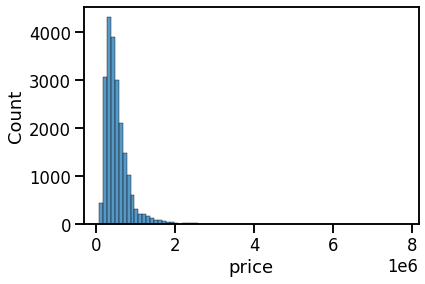

In [16]:
sns.histplot(df1,x='price',binwidth=100_000);

#### Python Answer - Plotly


In [18]:
## must calculate n_bins
n_bins=77
df1['price'].max()/n_bins

100000.0

In [20]:
px.histogram(df1,x='price',nbins=n_bins,width=800)

#### Tableau Answer

- Answer 1: 
    - Click Price then click Show Me > select histogram. 
- Answer 2: 
    - Right click on Price > Create > Bins
    - Columns = Price Bins
    - Rows = Price (CNT)    
    

### 4. A histogram of price in in $100K-bins - by Waterfront

#### Python Answer - seaborn

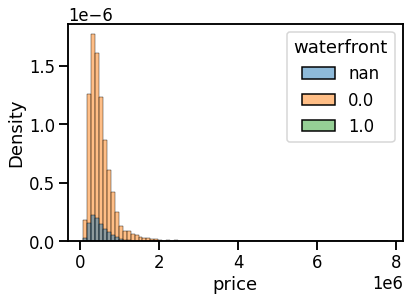

In [24]:
sns.histplot(df1,x='price',binwidth=100_000,hue='waterfront',stat='density');

#### Python Answer - Plotly


In [23]:
px.histogram(df1,x='price',color='waterfront',nbins=n_bins,
             width=800,barmode='overlay')

#### Tableau Answer

- Answer:
    - Duplicate plot #3
    - Drag Waterfront dimension to Color.

### 5. A map of median prices by zipcode (with a Green color scale broken into 5 shades of green)- see note about maps below.

    
> - **Note: for our maps, we want:**
    - A dark background,
    - Add County names/borders
    - Add major cities
    - Add terrain
    - Add major roadways. 

    

#### Python Answer - Plotly

- Not easily implementable without downloading [King County zipcode geojson file.](https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson)

In [ ]:
import requests,json
url ='https://opendata.arcgis.com/datasets/e6c555c6ae7542b2bdec92485892b6e6_113.geojson'
content = requests.get(url).json()
content.keys()



#### Kristin's Example code for using geojson with plotly

- [Repo Link](https://github.com/kcoop610/linear-regression-king-county-real-estate)
<img src="images/kristins-code-for-plotly-geojson.jpeg">

#### Tableau Answer

- Answer:
    - Drag Zipcode onto main pane of plot.
        - Drag Price onto Color
            - Change Price to Median
        - Click on Dropdown Arrow next to Title of Color Scale:
            - Edit Colors
            - Select Green
            - Select Stepped Color
        - Visual Flair: 
            - Right Click on Map > Map Layers
            - Select Dark
            - Add County borders, county labels,
            terrain, cities.

### 6. A map of all homes with color-coded price with the smallest markers possible. 

#### Python Answer - Plotly

In [32]:
px.scatter_mapbox(df1, lat='lat',lon='lon',color='price',mapbox_style='carto-darkmatter',
                  color_continuous_scale='greens', )

#### Tableau Answer

- Answer:
    - Columns: Long
    - Rows: Lat
    - Color: Price
    - Click on Size > Drag slider to the left.

### **Save the workbook to Tableau Public and make sure it shows all individual sheets.**

# Baltimore Crime Time Series Tasks

## Load in `baltimore_crime_ts.csv`

In [33]:
df2 = fs.datasets.load_ts_baltimore_crime_counts(read_csv_kwds={'parse_dates':['datetime']})
df2.to_csv('baltimore_crime_ts.csv')
df2.set_index('datetime',inplace=True)
display(df2.head(2))

AGG. ASSAULT  ARSON  AUTO THEFT  BURGLARY  COMMON ASSAULT  \
datetime                                                                
2014-01-01            22      0           9        20              19   
2014-01-02             6      0           7        28              23   

            HOMICIDE  LARCENY  LARCENY FROM AUTO  RAPE  ROBBERY - CARJACKING  \
datetime                                                                       
2014-01-01         2       34                 15     3                     0   
2014-01-02         3       26                 10     0                     1   

            ROBBERY - COMMERCIAL  ROBBERY - RESIDENCE  ROBBERY - STREET  \
datetime                                                                  
2014-01-01                     2                    1                 8   
2014-01-02                     1                    1                 4   

            SHOOTING  
datetime              
2014-01-01         2  
2014-01-02         0

- After saving the first notebook, close it and load in the other text file. 

## Plots to Make: Baltimore Crime Data

### 1. Create a time series plot of: shootings, Robbery-Street, Robbery-Carjacking, Homicide
    
    
    

#### Python Answer - pandas

In [34]:
plot_df = df2[['SHOOTING','ROBBERY - STREET',
               'ROBBERY - CARJACKING','HOMICIDE']].resample('W').sum()
plot_df

SHOOTING  ROBBERY - STREET  ROBBERY - CARJACKING  HOMICIDE
datetime                                                              
2014-01-05         5                31                     3         6
2014-01-12         4                45                     3        10
2014-01-19         6                53                     1         2
2014-01-26         6                32                     2         2
2014-02-02         7                59                     1         7
...              ...               ...                   ...       ...
2019-11-17        18                71                    14         8
2019-11-24         3                54                     5         6
2019-12-01         7                35                    17         3
2019-12-08        11                43                    10         8
2019-12-15        12                34                     5         5

[311 rows x 4 columns]

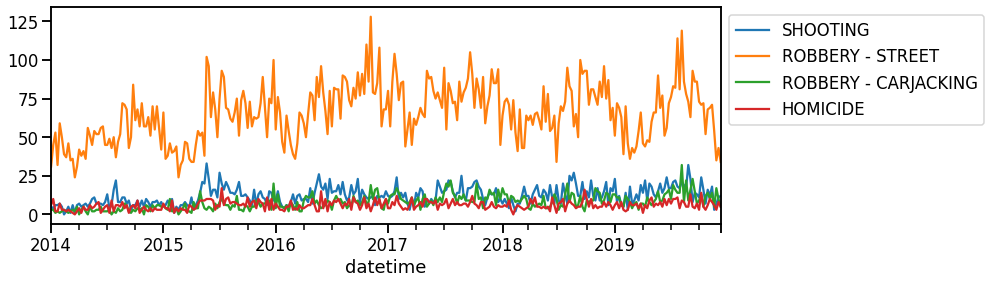

In [37]:
ax = plot_df.plot(figsize=(12,4))
ax.legend(bbox_to_anchor=[1,1])

#### Python Answer - Plotly

In [40]:
px.line(plot_df,width=900)

#### Tableau Answer

- Answer:
    - Double Click one of the crimes, e.g. Shooting
    - Double click Date.
    - Click on Date in the Columns box and click on Month from the second section of options. 
    - To add more crimes:
        - Click and drag their name into the upper left area of the y-axis until the || icon appears. 
    - Reference: https://community.tableau.com/s/question/0D54T00000C5hf4SAB/multiple-series-on-line-graph
    
    

### 2. Create a time series **area** plot of: shootings, Robbery-Street, Robbery-Carjacking, Homicide
    

#### Python Answer - pandas

#### Python Answer - plotly

#### Tableau Answer

- Answer:
    - Duplicate the prior sheet
    - To make an area chart: click drop down in Marks pane and select area. 

### Save the notebook to Tableau Public